In [8]:
%matplotlib notebook

In [9]:
import os
import csv
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [10]:
# set file path
csv_path = "vgsalesglobal.csv"

In [11]:
# create dataframe using pandas
vg_df = pd.read_csv(csv_path, encoding="utf-8")

# show first 5 entries to ensure csv file is read
vg_df.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [12]:
# reduce columns to show desired information
trifecta_unranked_df = vg_df[["Name","Platform","Year","Genre","NA_Sales","EU_Sales", "JP_Sales"]]

#show first 5 entries to verify changes
trifecta_unranked_df.head()

,Name,Platform,Year,Genre,NA_Sales,EU_Sales,JP_Sales
0,Wii Sports,Wii,2006.0,Sports,41.49,29.02,3.77
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81
2,Mario Kart Wii,Wii,2008.0,Racing,15.85,12.88,3.79
3,Wii Sports Resort,Wii,2009.0,Sports,15.75,11.01,3.28
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22


In [13]:
# check for null values
trifecta_unranked_df.count()

Name        16598
Platform    16598
Year        16327
Genre       16598
NA_Sales    16598
EU_Sales    16598
JP_Sales    16598
dtype: int64

In [14]:
# remove null values
clean_trifecta_df = trifecta_unranked_df.dropna(how="any")

# check for removed null values
clean_trifecta_df.count()

Name        16327
Platform    16327
Year        16327
Genre       16327
NA_Sales    16327
EU_Sales    16327
JP_Sales    16327
dtype: int64

In [15]:
# correct the sales columns to properly reflect the data
renamed_trifecta_df = clean_trifecta_df.rename(columns={'NA_Sales':'North America Sales in Millions',
                                                        'EU_Sales':'Europe Sales in Millions',
                                                       'JP_Sales':'Japan Sales in Millions'})

# check for corrected column names
renamed_trifecta_df.head()

,Name,Platform,Year,Genre,North America Sales in Millions,Europe Sales in Millions,Japan Sales in Millions
0,Wii Sports,Wii,2006.0,Sports,41.49,29.02,3.77
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81
2,Mario Kart Wii,Wii,2008.0,Racing,15.85,12.88,3.79
3,Wii Sports Resort,Wii,2009.0,Sports,15.75,11.01,3.28
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22


In [16]:
# Set X axis and tick locations
x_axis = np.arange(len(renamed_trifecta_df))
tick_locations = [value+0.4 for value in x_axis]

<IPython.core.display.Javascript object>


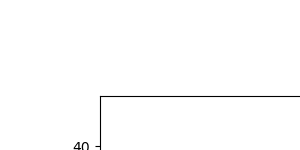

([<matplotlib.axis.XTick at 0x1736cdfd708>,
  ...],
 [Text(0.4, 0, 'Wii Sports'),
  Text(1.4, 0, 'Super Mario Bros.'),
  Text(2.4, 0, 'Mario Kart Wii'),
  Text(3.4, 0, 'Wii Sports Resort'),
  Text(4.4, 0, 'Pokemon Red/Pokemon Blue'),
  Text(5.4, 0, 'Tetris'),
  Text(6.4, 0, 'New Super Mario Bros.'),
  Text(7.4, 0, 'Wii Play'),
  Text(8.4, 0, 'New Super Mario Bros. Wii'),
  Text(9.4, 0, 'Duck Hunt'),
  Text(10.4, 0, 'Nintendogs'),
  Text(11.4, 0, 'Mario Kart DS'),
  Text(12.4, 0, 'Pokemon Gold/Pokemon Silver'),
  Text(13.4, 0, 'Wii Fit'),
  Text(14.4, 0, 'Wii Fit Plus'),
  Text(15.4, 0, 'Kinect Adventures!'),
  Text(16.4, 0, 'Grand Theft Auto V'),
  Text(17.4, 0, 'Grand Theft Auto: San Andreas'),
  Text(18.4, 0, 'Super Mario World'),
  Text(19.4, 0, 'Brain Age: Train Your Brain in Minutes a Day'),
  Text(20.4, 0, 'Pokemon Diamond/Pokemon Pearl'),
  Text(21.4, 0, 'Super Mario Land'),
  Text(22.4, 0, 'Super Mario Bros. 3'),
  Text(23.4, 0, 'Grand Theft Auto V'),
  Text(24.4, 0, 'Grand The

In [19]:
# Create bar chart for sales in millions per country
plt.figure(figsize=(10,10))
plt.bar(x_axis, renamed_trifecta_df["North America Sales in Millions"], color="g", alpha=0.5, align="edge")
plt.xticks(tick_locations, renamed_trifecta_df["Name"], rotation='vertical')